## Assignment 6 - Netflix Titles - Data Wrangling
### Using Pandas, Numpy, PostgresSQL

Psuedocode
- Import netflix csv data
- Transform data using Pandas or Numpy
- Clean data using Pandas or Numpy
- Export data using Pandas to PostgresSQL <-- ERD Created, DDL Created, DF Not Imported in DBMS
- Ask and Answer Five Meaningful Questions in Pandas
- Provide plots for each answer in Pandas using Seaborn or Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # needed for the line graph date setting on x axis
import seaborn as sns
from IPython.display import display, HTML # to color my my dataframe Titles


# import netflix csv as dataframe
netflixdf = pd.read_csv("netflix_titles.csv")

# setting show_id column as index column
netflixdf = pd.read_csv("netflix_titles.csv", index_col=0)

# check shape of data frame
netflixdf.shape


(8807, 11)

In [2]:
# check top 5 rows of netflix dataframe
netflixdf.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# checking the column types in netflixdf
netflixdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [4]:
# checking datatypes for the columns
netflixdf.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
# checking distinct values for each column in dataframe
netflixdf.nunique()

type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [6]:
#checking for NaN in columns of dataframe
nan_count = netflixdf.isna().sum()
nan_count

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Column headers
netflixdf.head(0)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


In [8]:
# Strip white spaces from all object columns
object_columns = netflixdf.select_dtypes(['object']).columns
netflixdf[object_columns] = netflixdf[object_columns].apply(lambda x: x.str.strip())

# Ensure the data type of object columns remains as 'object'
netflixdf[object_columns] = netflixdf[object_columns].astype('object')


In [9]:
# replace all instances of double spaces to be single space
netflixdf.replace('', ' ', inplace=True)
netflixdf

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [10]:
#checking for NaN in columns of dataframe
nan_count = netflixdf.isna().sum()
nan_count

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
# verify datatypes for the columns after previous steps
netflixdf.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [12]:
# max character count for description column for ERD varchar count
# Finding the length of characters for each column
max_lengths = netflixdf.map(lambda x: len(str(x)))

# Displaying the maximum character lengths for each column - for dbms structure
print("Maximum lengths for each column:")
max_lengths.max()


Maximum lengths for each column:


type              7
title           104
director        208
cast            771
country         123
date_added       18
release_year      4
rating            8
duration         10
listed_in        79
description     248
dtype: int64

In [13]:
# displaying the unqiue values for the rating column
rating_unique = netflixdf.rating.unique()
rating_unique

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
# Create a boolean mask for rows that meet the condition ('74 min', '84 min', '66 min')
condition = netflixdf['rating'].isin(['74 min', '84 min', '66 min']) 

# applying filter to dataframe
filtereddf = netflixdf[condition]

# display dataframe
filtereddf


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [15]:
# moves the three duration values from the Rating column to the Duration Column for these rows
# Leave the 3 rating column rows with NaN

# Create a boolean mask for rows that meet the condition ('74 min', '84 min', '66 min')
condition = netflixdf['rating'].isin(['74 min', '84 min', '66 min'])

# Update 'duration' column and leave NaN in 'rating' column for the specified rows
netflixdf.loc[condition, 'duration'] = netflixdf.loc[condition, 'rating']

# Set NaN in 'rating' column for the specified rows
netflixdf.loc[condition, 'rating'] = np.nan

In [16]:
# displaying the unqiue values for the rating column
rating_unique1 = netflixdf.rating.unique()

# display values
rating_unique1

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [17]:
#checking for NaN in dataframe
nan_count1 = netflixdf.isna().sum()

# Display values
nan_count1

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [18]:
# Updating date added column to match DB Time format yyyy-mm-dd
netflixdf['date_added'] = pd.to_datetime(netflixdf['date_added'], errors='coerce')

# Convert the pd.to_datetime values to the format of 'yyyy-mm-dd'
netflixdf['date_added'] = netflixdf['date_added'].dt.strftime('%Y-%m-%d')

# Display the DataFrame
netflixdf


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [19]:
#checking for NaN in dataframe to see if date_added increased or stayed the same
nan_count2 = netflixdf.isna().sum()

# display values
nan_count2

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<h1 style="color: blue; font-weight: bold;">Question 1:</h1>
<h2 style="color: dodgerblue; font-weight: bold;">What Countries have the Most Netflix Titles Regionally Available?</h2>

In [20]:
# # Create new dataframe from original 
countrydf = netflixdf.copy()

# Convert the 'country' column to lists by splits comma separated values
countrydf['country'] = countrydf['country'].str.split(', ')

# Explode country column cells
countrydf = countrydf.explode('country')

# Print exploded country DataFrame to verify 's8' has multiple listed in countries
countrydf.loc['s8']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ethiopia,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [21]:
# value count of the top countries which have the most shows listed in

ListedInCount = countrydf.copy()
# counting values and resetting the index and dropping na values
ListedInCount = ListedInCount.country.value_counts(dropna=True).reset_index()
# Starts the index at 1 not 0
ListedInCount.index = ListedInCount.index + 1
#display dataframe
ListedInCount

,country,count
1,United States,3689
2,India,1046
3,United Kingdom,804
4,Canada,445
5,France,393
...,...,...
123,Bermuda,1
124,Ecuador,1
125,Armenia,1
126,Mongolia,1


In [22]:
# Top 5 Countries in Named columns
# names the ListedInCount columns 'Listed In Country', 'Country Count'
ListedInCount.columns = ['Country', 'Title Count']

# had to google how to change the color on a notebook, didn't know it was HTML based
#font style and title
display(HTML('<h1 style="color: blue; font-weight: bold;">Question 1 Answer</h1>'))
display(HTML('<h2 style="color: dodgerblue; font-weight: strong;">Countries that have the Largest Quantity of Netflix Titles Available</h2>'))

#list top 5 countries head() defaults to 5
ListedInCount.head()

,Country,Title Count
1,United States,3689
2,India,1046
3,United Kingdom,804
4,Canada,445
5,France,393


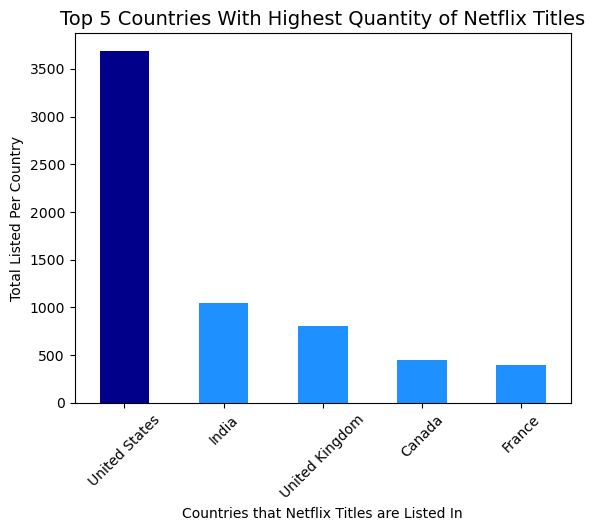

In [23]:
top_5_countries = ListedInCount.sort_values(by='Title Count', ascending=False).head(5)

# Plot the bar chart
# Used Chat GPT to help me do the 1 color and 4 colors on the bar chart
# Set the color for the bar with the largest count
colors = ['darkblue' if country == top_5_countries.iloc[0]['Country'] else 'dodgerblue' for country in top_5_countries['Country']]

# had to google how to change the color on a notebook, didn't know it was HTML based
#font style and title
display(HTML('<h1 style="color: blue; font-weight: bold;">Question 1 Answer</h1>'))
display(HTML('<h2 style="color: dodgerblue; font-weight: strong;">Countries that have the Largest Quantity of Netflix Titles Available</h2>'))

# Plot creation
top_5_countries.plot(kind='bar', x='Country', y='Title Count', color=colors, legend=False)

# Plot Labels
plt.xlabel('Countries that Netflix Titles are Listed In')
plt.ylabel('Total Listed Per Country')

# Plot title
plt.title('Top 5 Countries With Highest Quantity of Netflix Titles', fontsize = 14)

# Set the rotation of x-axis labels
plt.tick_params(axis='x', rotation=45)
plt.show()

<h1 style="color: blue; font-weight: bold;">Question 2:</h1>
<h2 style="color: dodgerblue; font-weight: bold;">Who are the Top 10 Actors that appear the Most in the Listed Netflix Titles?</h2>

In [24]:
# Copy original DataFrame to avoid modifying it
castdf= netflixdf.copy()

# Convert the 'cast' column to lists
castdf['cast'] = castdf['cast'].str.split(', ')

# Explode specified columns
castdf = castdf.explode('cast')

#display dataframe 
castdf

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...
s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [25]:
# Copy castdf DataFrame to avoid modifying it
top_10_actors = castdf.copy()

# Drop NaN values in the 'cast' column and get the value counts
top_10_actors = top_10_actors['cast'].value_counts(dropna=True).reset_index()

# Rename columns
top_10_actors.columns = ['Actor Name', 'Netflix Roles']

# Sort by 'Netflix Roles' in descending order and then by 'Actor Name' in ascending order
top_10_actors.sort_values(by=['Netflix Roles', 'Actor Name'], ascending=[False, True], inplace=True)

# Reset the index and set it to start at 1
top_10_actors.reset_index(drop=True, inplace=True)
top_10_actors.index = top_10_actors.index + 1

# had to google how to change the color on a notebook, didn't know it was HTML based
# font style and title
display(HTML('<h1 style="color: blue; font-weight: bold;">Question 2 Answer</h1>'))
display(HTML('<h2 style="color: dodgerblue; font-weight: strong;">Top 10 Actors that Appeared in the Most Netflix Titles</h2>'))

# list top 5 countries head() defaults to 5
top_10_actors.head(10)

,Actor Name,Netflix Roles
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Akshay Kumar,30
8,Om Puri,30
9,Yuki Kaji,29
10,Amitabh Bachchan,28


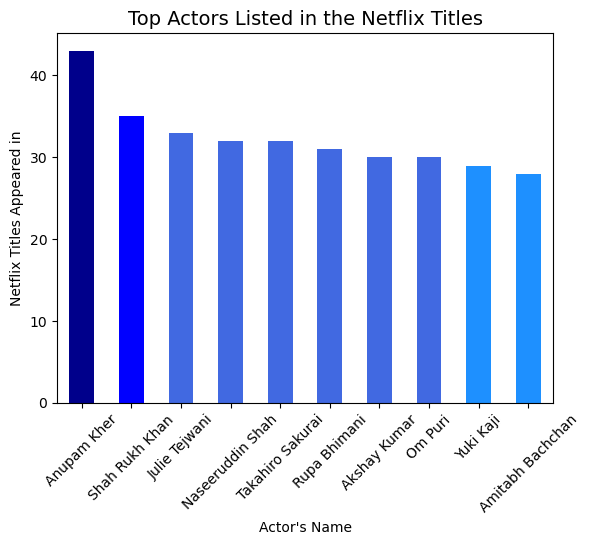

In [26]:
# isolating the top 10 actors based on the count of netflix titles they appeared in
top_10_actors = top_10_actors.sort_values(by='Netflix Roles', ascending=False).head(10)

# had to google how to change the color on a notebook, didn't know it was HTML based
# font style and title
display(HTML('<h1 style="color: blue; font-weight: bold;">Question 2 Answer</h1>'))
display(HTML('<h2 style="color: dodgerblue; font-weight: strong;">Top 10 Actors that Appeared in the Most Netflix Titles</h2>'))

# I wanted to have separate color ranges instead of just highlighting one color like the previous plot
# Set color ranges (a dictionary!)
color_ranges = {
    '>=40': 'darkblue',
    '>=35': 'blue',
    '>=30': 'royalblue',
    '<30': 'dodgerblue'
}

# Function to map colors based on Netflix Roles
def map_color(netflix_roles):
    if netflix_roles >= 40:
        return color_ranges['>=40']
    elif netflix_roles >= 35:
        return color_ranges['>=35']
    elif netflix_roles >= 30:
        return color_ranges['>=30']
    else:
        return color_ranges['<30']

# Apply the color mapping function
top_10_actors['Color'] = top_10_actors['Netflix Roles'].apply(map_color)

# Plot the bar chart
top_10_actors.plot(kind='bar', x='Actor Name', y='Netflix Roles', color=top_10_actors['Color'], legend=False)

# Label the x,y axis
plt.xlabel("Actor's Name")
plt.ylabel('Netflix Titles Appeared in')

# Label the plot
plt.title('Top Actors Listed in the Netflix Titles', fontsize = 14)

# Set the rotation of x-axis labels
plt.tick_params(axis='x', rotation=45)

#display plot
plt.show()

<h1 style="color: blue; font-weight: bold;">Question 3:</h1>
<h3 style="color: dodgerblue; font-weight: bold;">For the Top 10 Actors: How Many Movies and How Many TV Shows did they Appear In?</h3>

In [27]:
# copy exploded castdf dataframe to show_movie dataframe to continue analysis
show_movie = castdf.copy()

# displays only the cast and the type column
show_movie = show_movie[['cast','type']].dropna()

# drops the original index and resets the index
show_movie.reset_index(drop=True, inplace=True)

# sets show_movie index to start at 1
show_movie.index = show_movie.index + 1

# display dataframe
show_movie

,cast,type
1,Ama Qamata,TV Show
2,Khosi Ngema,TV Show
3,Gail Mabalane,TV Show
4,Thabang Molaba,TV Show
5,Dillon Windvogel,TV Show
...,...,...
64122,Manish Chaudhary,Movie
64123,Meghna Malik,Movie
64124,Malkeet Rauni,Movie
64125,Anita Shabdish,Movie


In [28]:
# Count occurrences of each cast name for each 'type'
cast_count = show_movie.groupby(['cast', 'type']).size().unstack(fill_value=0)

# Add a new column 'total_count' representing the total count for each cast name
cast_count['total_count'] = cast_count['Movie'] + cast_count['TV Show']

# Sort the DataFrame by 'total_count' in descending order
cast_count = cast_count.sort_values(by='total_count', ascending=False).head(10)

# Reset the index and set it to start at 1
cast_count.reset_index(inplace=True)
cast_count.index = cast_count.index + 1

# removing title from index column
cast_count.index.name = None

# Label the final columns
cast_count.columns = ['Actors Name', 'Movie Roles', 'TV Roles', 'Total Roles']

# had to google how to change the color on a notebook, didn't know it was HTML based
# font style and title
display(HTML('<h1 style="color: blue; font-weight: bold;">Question 3 Answer</h1>'))
display(HTML('<h2 style="color: dodgerblue; font-weight: strong;">Top 10 Actors and their Movie versus TV Show Appearances</h2>'))

# Display the result
cast_count


,Actors Name,Movie Roles,TV Roles,Total Roles
1,Anupam Kher,42,1,43
2,Shah Rukh Khan,35,0,35
3,Julie Tejwani,28,5,33
4,Naseeruddin Shah,32,0,32
5,Takahiro Sakurai,7,25,32
6,Rupa Bhimani,27,4,31
7,Akshay Kumar,30,0,30
8,Om Puri,30,0,30
9,Yuki Kaji,10,19,29
10,Amitabh Bachchan,28,0,28


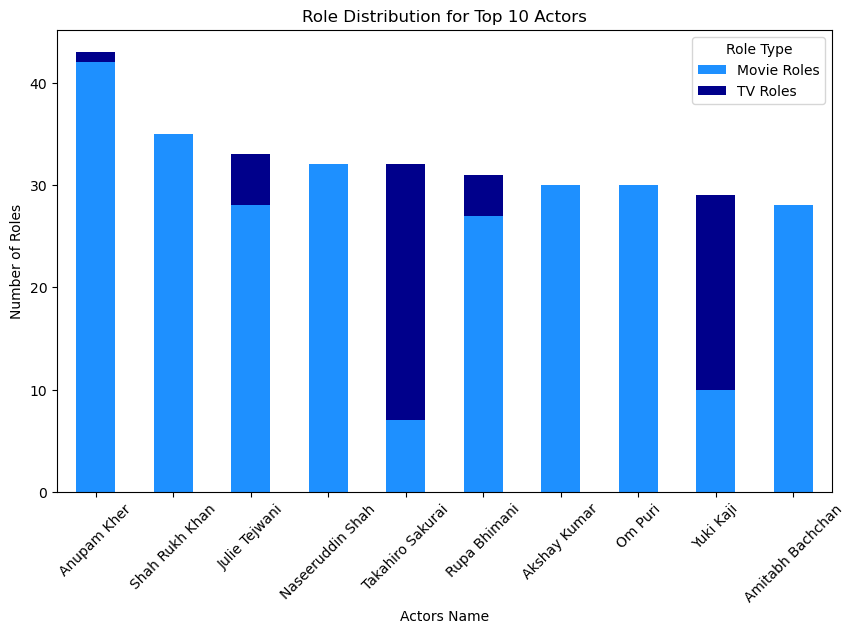

In [29]:
# Create new dataframe for plotting from exploded cast dataframe 
roles_df = cast_count.copy()

# Specifying which columns are to be included in the plot
roles_df = roles_df[['Actors Name', 'Movie Roles', 'TV Roles']]

# had to google how to change the color on a notebook, didn't know it was HTML based
# font style and title
display(HTML('<h1 style="color: blue; font-weight: bold;">Question 3 Answer</h1>'))
display(HTML('<h2 style="color: dodgerblue; font-weight: strong;">Top 10 Actors and their Movie versus TV Show Appearances</h2>'))

# Plotting for role_df
roles_df.set_index('Actors Name').plot(kind='bar', stacked=True, figsize=(10, 6), color =['dodgerblue', 'darkblue'])

# Title of plot
plt.title('Role Distribution for Top 10 Actors')

# x and y labels
plt.xlabel('Actors Name')
plt.ylabel('Number of Roles')

# Plot legend
plt.legend(title='Role Type', loc='upper right')

# Set the rotation of x-axis labels
plt.tick_params(axis='x', rotation=45)

# display the plot
plt.show()

<h1 style="color: blue; font-weight: bold;">Question 4:</h1>
<h3 style="color: dodgerblue; font-weight: bold;">What did the timeline look like for Netflix to release these titles on its service?</h3>

In [30]:
# create new dataframe from original netflixdf
timeline = netflixdf.copy()

# Convert 'date_added' to datetime format
timeline['date_added'] = pd.to_datetime(timeline['date_added'])

# display na in added column
date_na = timeline.date_added.isna().sum()
print(f'There are {date_na} nulls in the date_added column') 
timeline.head()

There are 10 nulls in the date_added column


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [31]:
# drop na values in date_added
timeline = timeline.dropna(subset=['date_added'])

# display na in added column
date_na = timeline.date_added.isna().sum()
print(f'There are {date_na} nulls in the date_added column') 

# display dataframe
timeline.head()

There are 0 nulls in the date_added column


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [32]:
# Specify the columns that will be included in the result
timeline = timeline[['title', 'type', 'date_added', 'duration']].reset_index(drop=True)

# new dataframe for plotting
typeplot = timeline.copy()

# Sort the entire DataFrame by 'type' and 'date_added'
timeline_sorted = timeline.sort_values(by=['type', 'date_added'])

# Group by 'type' and 'year_added', then calculate the cumulative count for each group
timeline_sorted['cumulative_count'] = timeline_sorted.groupby(['type', timeline_sorted['date_added'].dt.year]).cumcount() + 1

# Pivot the DataFrame to get cumulative counts by year for each group
timeline_sorted = timeline_sorted.pivot_table(index='type', columns=timeline_sorted['date_added'].dt.year, values='cumulative_count', aggfunc='max')

# Fill NaN values with 0 and add a 'Total' column
timeline_sorted.fillna(0, inplace=True)
timeline_sorted['Total Titles'] = timeline_sorted.sum(axis=1)

# Convert float columns to integers
timeline_sorted = timeline_sorted.astype(int)

# Resetting the column index name to remove the 'date_added' label
timeline_sorted.columns.name = None

# Updating Index Column Name
timeline_sorted.index.name = 'Format Type'

# had to google how to change the color on a notebook, didn't know it was HTML based
# font style and title
display(HTML('<h1 style="color: blue; font-weight: bold;">Question 4 Answer</h1>'))
display(HTML('<h2 style="color: dodgerblue; font-weight: strong;">Annual Release of Movie and TV Shows on Netflix</h2>'))

# Display the resulting DataFrame
timeline_sorted

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total Titles
Format Type,,,,,,,,,,,,,,,
Movie,1,2,1,13,3,6,19,56,253,839,1237,1424,1284,993,6131
TV Show,1,0,0,0,0,5,5,26,176,349,412,592,595,505,2666


In [33]:
# Seaborn library had future warnings, used this following code to stop displaying them
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

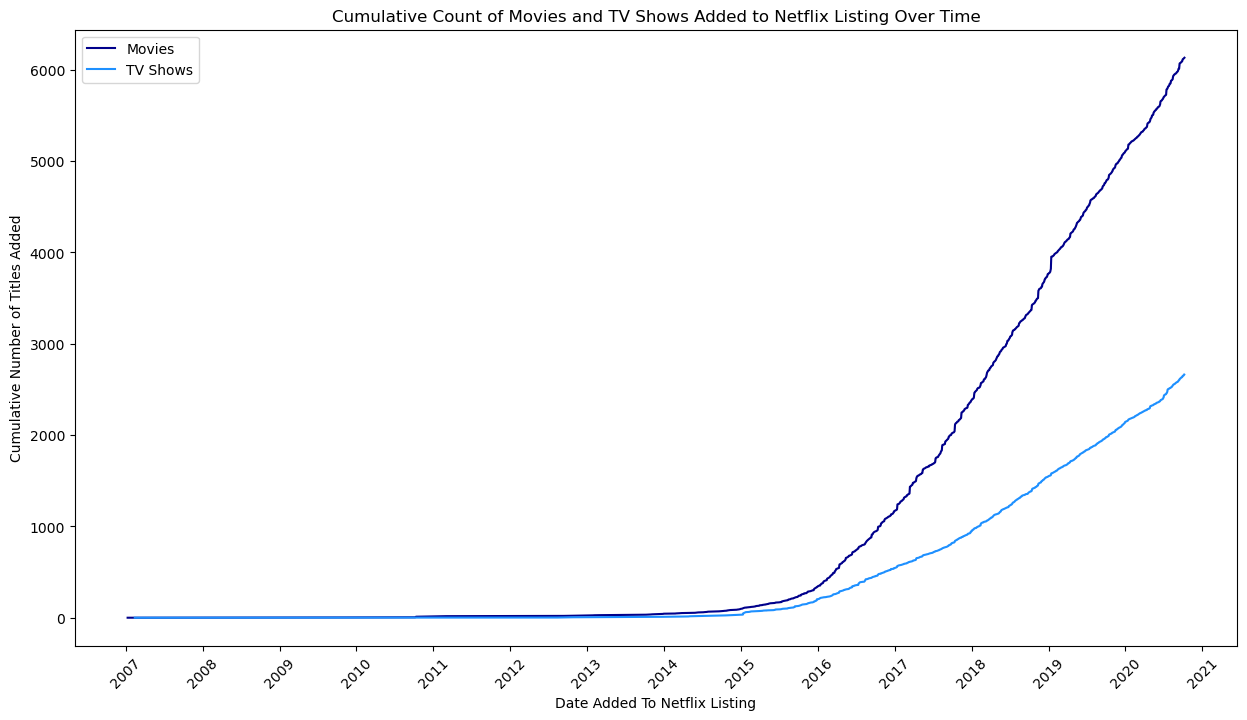

In [34]:
# Sort the entire DataFrame by 'type' and 'date_added'
typeplot = typeplot.sort_values(by=['type', 'date_added'])

# Reset the index for each group starting from 1
typeplot['Type Count'] = typeplot.groupby('type').cumcount() + 1

# Reset the overall index
typeplot.reset_index(drop=True, inplace=True)

# Copying dataframe for plotting dataframe
group_plot = typeplot.copy()

"""
This code was created using the linkedin video seaborn code and 2 hours of ChatGPT massaging because 
i know what i wanted my plot to look like, but between the errors and inconsistencies from ChatGPT, 
this is the best representation i could create from the data wrangling i did previously
"""
# Convert 'date_added' to datetime format
group_plot['date_added'] = pd.to_datetime(group_plot['date_added'])

# Verifying that each group starts at index 1
group_plot['Type Count'] = group_plot.sort_values(by=['type', 'date_added']).groupby('type').cumcount() + 1

# Separate the DataFrame into Movies and TV Shows
movies_df = group_plot[group_plot['type'] == 'Movie'].copy()
tv_shows_df = group_plot[group_plot['type'] == 'TV Show'].copy()

# Resetting the overall index and setting 'Type Count' as the index for movies_df
movies_df.reset_index(drop=True, inplace=True)
movies_df.set_index('Type Count', inplace=True)

# Resetting the overall index and setting 'Type Count' as the index for tv_shows_df
tv_shows_df.reset_index(drop=True, inplace=True)
tv_shows_df.set_index('Type Count', inplace=True)

# Plot the cumulative count of Movies and TV Shows over time
plt.figure(figsize=(15, 8))

# Plot the cumulative count of Movies over time
sns.lineplot(x= 'date_added', y= 'Type Count', data = movies_df, label = 'Movies', color = 'darkblue')

# Plot the cumulative count of TV Shows over time
sns.lineplot(x='date_added', y='Type Count', data=tv_shows_df, label='TV Shows', color = 'dodgerblue')

# axis labels
plt.xlabel('Date Added To Netflix Listing')
plt.ylabel('Cumulative Number of Titles Added')

# Plot title
plt.title('Cumulative Count of Movies and TV Shows Added to Netflix Listing Over Time')

# Display plot
# Add a legend to differentiate between Movies and TV Shows
plt.legend() 

# Rotate x-axis ticks for better readability
plt.xticks(rotation=45)

# Set major locator to yearly ticks
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(365))

# Format x-axis ticks to display only the years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# had to google how to change the color on a notebook, didn't know it was HTML based
# font style and title
display(HTML('<h1 style="color: blue; font-weight: bold;">Question 4 Answer</h1>'))
display(HTML('<h2 style="color: dodgerblue; font-weight: strong;">Cumulative Count of Movies and TV Shows added to Netflix over Time \n From 2007 to 2021</h2>'))

# Show the plot
plt.show()


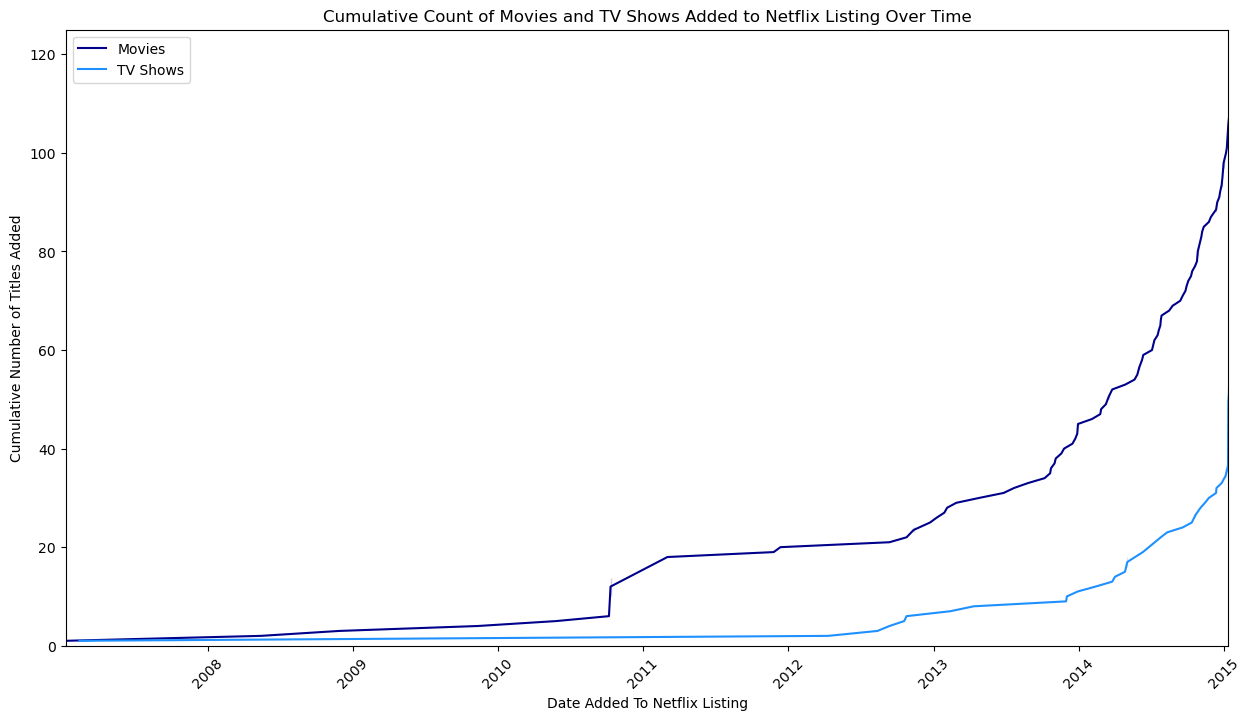

In [35]:
"""
This code was created using the linkedin video seaborn code and 2 hours of ChatGPT massaging because 
i know what i wanted my plot to look like, but between the errors and inconsistencies from ChatGPT, 
this is the best representation i could create from the data wrangling i did previously

Also this is a zoomed in version of the above plot code 
"""
# Convert 'date_added' to datetime format
group_plot['date_added'] = pd.to_datetime(group_plot['date_added'])

# Verifying that each group starts at index 1
group_plot['Type Count'] = group_plot.sort_values(by=['type', 'date_added']).groupby('type').cumcount() + 1

# Separate the DataFrame into Movies and TV Shows
movies_df = group_plot[group_plot['type'] == 'Movie'].copy()
tv_shows_df = group_plot[group_plot['type'] == 'TV Show'].copy()

# Resetting the overall index and setting 'Type Count' as the index for movies_df
movies_df.reset_index(drop=True, inplace=True)
movies_df.set_index('Type Count', inplace=True)

# Resetting the overall index and setting 'Type Count' as the index for tv_shows_df
tv_shows_df.reset_index(drop=True, inplace=True)
tv_shows_df.set_index('Type Count', inplace=True)

# Plot the cumulative count of Movies and TV Shows over time
plt.figure(figsize=(15, 8))

# Plot the cumulative count of Movies over time
sns.lineplot(x='date_added', y='Type Count', data=movies_df, label='Movies', color='darkblue')

# Plot the cumulative count of TV Shows over time
sns.lineplot(x='date_added', y='Type Count', data=tv_shows_df, label='TV Shows', color='dodgerblue')

# Convert date strings to datetime objects
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2016-01-01')

# Set x-axis limits to zoom in to the date range from 2007 to 2017
plt.xlim([start_date, end_date])

# Set y-axis limits to 125 titles
plt.ylim(0, 125)

# axis labels
plt.xlabel('Date Added To Netflix Listing')
plt.ylabel('Cumulative Number of Titles Added')

# Plot title
plt.title('Cumulative Count of Movies and TV Shows Added to Netflix Listing Over Time')

# Display plot
# Add a legend to differentiate between Movies and TV Shows
plt.legend(loc='upper left') 

# Rotate x-axis ticks for better readability
plt.xticks(rotation=45)

# Set major locator to yearly ticks
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(365))

# Format x-axis ticks to display only the years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# had to google how to change the color on a notebook, didn't know it was HTML based
# font style and title
display(HTML('<h1 style="color: blue; font-weight: bold;">Question 4 Answer</h1>'))
display(HTML('<h2 style="color: dodgerblue; font-weight: strong;">Cumulative Count of Movies and TV Shows added to Netflix over Time From 2008 to 2015 (Zoomed In)</h2>'))

# Show the plot
plt.show()

<h1 style="color: blue; font-weight: bold;">Question 5:</h1>
<h3 style="color: dodgerblue; font-weight: bold;">What is the Average Length of the Movies and Seasons based on the Listed Netflix Titles? </h3>

In [36]:
# creates duration dataframe from updated netflixdf dataframe
duration = netflixdf.copy()

# Check duration column for nulls
print(f'In the duration column there is {duration.duration.isna().sum()} null(s)')
# Check title column for nulls
print(f'In the title column there is {duration.title.isna().sum()} null(s)')
# Check type column for nulls
print(f'In the type column there is {duration.type.isna().sum()} null(s)')

In the duration column there is 0 null(s)
In the title column there is 0 null(s)
In the type column there is 0 null(s)


In [37]:
# copying dataframe that is only movies from duration DataFrame
m_duration = duration[duration['type'] == 'Movie'].copy()

# splitting duration column into time and units for aggregation
m_duration['time'] = m_duration['duration'].str.extract('(\d+)').astype(float)
m_duration['unit'] = m_duration['duration'].str.extract('([a-zA-Z]+)')

# Display the updated m_duration DataFrame
m_duration


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,time,unit
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,min
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0,min
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104.0,min
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96.0,min
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,min


In [38]:
# display the columns that will be worked with
m_duration = m_duration[['title', 'time', 'unit', 'duration']].reset_index(drop=True)

# Display updated column dataframe
m_duration

,title,time,unit,duration
0,Dick Johnson Is Dead,90.0,min,90 min
1,My Little Pony: A New Generation,91.0,min,91 min
2,Sankofa,125.0,min,125 min
3,The Starling,104.0,min,104 min
4,Je Suis Karl,127.0,min,127 min
...,...,...,...,...
6126,Zinzana,96.0,min,96 min
6127,Zodiac,158.0,min,158 min
6128,Zombieland,88.0,min,88 min
6129,Zoom,88.0,min,88 min


In [39]:
# Summary statistics on the time column
movie_stats = m_duration['time'].describe()

# display summary stats
print(movie_stats)

# Calculate how many bins to use based on square root of the number of rows
print()
moviebin = int(np.sqrt(movie_stats['count']))
print(f'Use {moviebin} bins for histogram')

count    6131.000000
mean       99.564998
std        28.289504
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: time, dtype: float64

Use 78 bins for histogram


The average movie length is 99.56 minutes


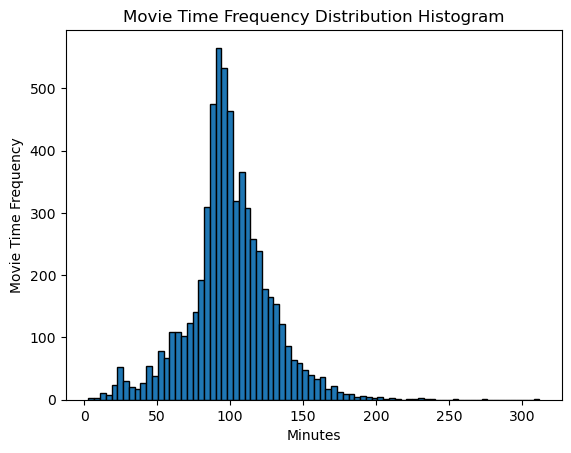

In [40]:
# plot of the frequency distribution for the Movie time using bin variable
plt.hist(m_duration['time'], bins=moviebin, edgecolor='black')

# plot title
plt.title('Movie Time Frequency Distribution Histogram')

# axis lables
plt.xlabel('Minutes')
plt.ylabel('Movie Time Frequency')

# Display the mean from the summary statistics with 2 decimal places
print(f'The average movie length is {movie_stats["mean"]:.2f} minutes')

# show plot
plt.show()

In [41]:
# copying dataframe that is only TV Shows from duration DataFrame
tv_duration = duration[duration['type'] == 'TV Show'].copy()

# splitting duration column into time and units for aggregation
tv_duration['time'] = tv_duration['duration'].str.extract('(\d+)').astype(float)
tv_duration['unit'] = tv_duration['duration'].str.extract('([a-zA-Z]+)')

# verify the dataframe is just tv shows
tv_duration

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,time,unit
show_id,,,,,,,,,,,,,
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons
s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1.0,Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2.0,Seasons
s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2.0,Seasons
s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,3.0,Seasons


In [42]:
# display the columns that will be worked with
tv_duration = tv_duration[['title', 'time', 'unit', 'duration']].reset_index(drop=True)

# Display updated column dataframe
tv_duration

,title,time,unit,duration
0,Blood & Water,2.0,Seasons,2 Seasons
1,Ganglands,1.0,Season,1 Season
2,Jailbirds New Orleans,1.0,Season,1 Season
3,Kota Factory,2.0,Seasons,2 Seasons
4,Midnight Mass,1.0,Season,1 Season
...,...,...,...,...
2671,Yu-Gi-Oh! Arc-V,2.0,Seasons,2 Seasons
2672,Yunus Emre,2.0,Seasons,2 Seasons
2673,Zak Storm,3.0,Seasons,3 Seasons
2674,Zindagi Gulzar Hai,1.0,Season,1 Season


In [43]:
# Summary statistics on the time column
tv_stats = tv_duration['time'].describe()

# display summary stats
print(tv_stats)

# Calculate how many bins to use based on square root of the number of rows
print()
tvbin = int(np.sqrt(tv_stats['count']))
print(f'Use {tvbin} bins for histogram')

count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: time, dtype: float64

Use 51 bins for histogram


The average number of TV Show Seasons is 1.76 seasons


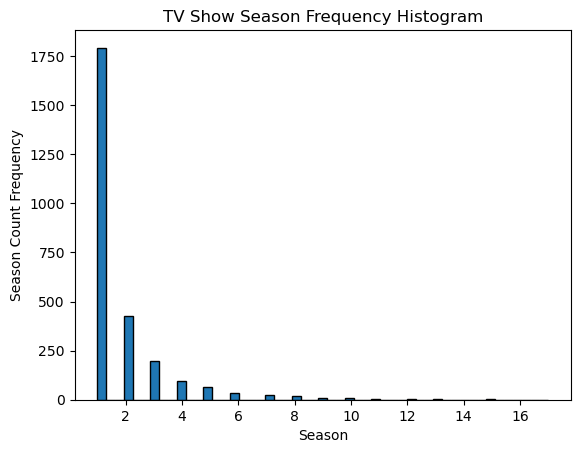

In [44]:
# Display the mean from the summary statistics with 2 decimal places
print(f'The average number of TV Show Seasons is {tv_stats["mean"]:.2f} seasons')

# plot of the frequency distribution for the average number of Show Seasons
plt.hist(tv_duration['time'], bins=tvbin, edgecolor='black')

# plot title
plt.title('TV Show Season Frequency Histogram')

# axis labels
plt.xlabel('Season')
plt.ylabel('Season Count Frequency')

# display plot
plt.show()

The average movie length is 99.56 minutes


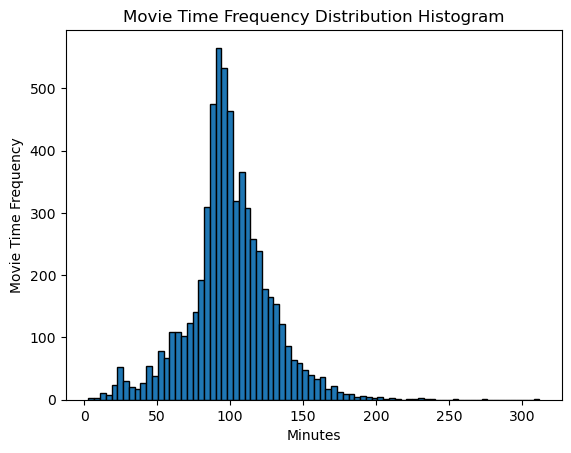

In [45]:
# had to google how to change the color on a notebook, didn't know it was HTML based
# font style and title
display(HTML('<h1 style="color: blue; font-weight: bold;">Question 5 Answer - For Movies -</h1>'))
display(HTML('<h2 style="color: dodgerblue; font-weight: strong;">Average Length of Netflix Movies from this List</h2>'))

# plot of the frequency distribution for the Movie time using bin variable
plt.hist(m_duration['time'], bins=moviebin, edgecolor='black')

# plot title
plt.title('Movie Time Frequency Distribution Histogram')

# axis lables
plt.xlabel('Minutes')
plt.ylabel('Movie Time Frequency')

# Display the mean from the summary statistics with 2 decimal places
print(f'The average movie length is {movie_stats["mean"]:.2f} minutes')

# show plot
plt.show()

The average number of TV Show Seasons is 1.76 seasons


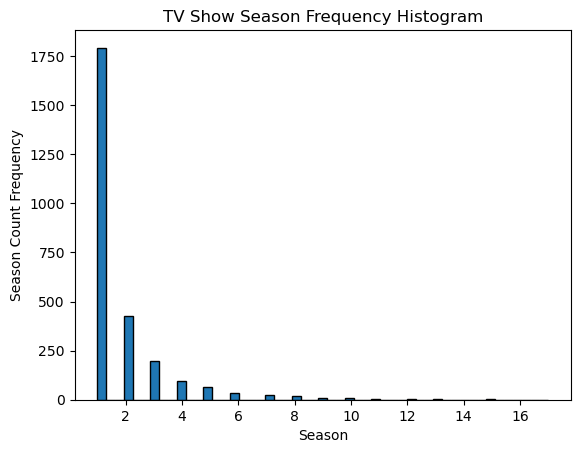

In [46]:
# had to google how to change the color on a notebook, didn't know it was HTML based
# font style and title
display(HTML('<h1 style="color: blue; font-weight: bold;">Question 5 Answer - For TV Shows -</h1>'))
display(HTML('<h2 style="color: dodgerblue; font-weight: strong;">Average Season Quantity Netflix TV Shows from this List</h2>'))

# Display the mean from the summary statistics with 2 decimal places
print(f'The average number of TV Show Seasons is {tv_stats["mean"]:.2f} seasons')

# plot of the frequency distribution for the average number of Show Seasons
plt.hist(tv_duration['time'], bins=tvbin, edgecolor='black')

# plot title
plt.title('TV Show Season Frequency Histogram')

# axis labels
plt.xlabel('Season')
plt.ylabel('Season Count Frequency')

# display plot
plt.show()

In [1]:
!jupyter nbconvert --to pdf netflixtitles.ipynb

[NbConvertApp] Converting notebook netflixtitles.ipynb to pdf
[NbConvertApp] Support files will be in netflixtitles_files\
[NbConvertApp] Making directory .\netflixtitles_files
[NbConvertApp] Writing 167013 bytes to notebook.tex
[NbConvertApp] Building PDF
Traceback (most recent call last):
  File "C:\Users\james\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "C:\Users\james\anaconda3\Lib\site-packages\jupyter_core\application.py", line 280, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\james\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\james\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 412, in start
    self.convert_notebooks()
  File "C:\Users\james\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 590, in convert_notebooks
    self.convert_single_noteb

<h1 style="color: blue; font-weight: bold;">Everything Below Here was DBMS Prep</h1>
<h3 style="color: dodgerblue; font-weight: bold;">The goal was to explode every column so the data can be inputted into DBMS <-----Which i do not know how to do  </h3>

In [48]:

# # Create a boolean mask for rows where 'director' contains a comma
# condition_director_comma = netflixdf['director'].str.contains(',', na=False)

# # Apply the boolean mask to filter the DataFrame
# director_comma_rows = netflixdf[condition_director_comma]

# # Display the rows where 'director' contains a comma
# director_comma_rows

In [49]:
# # Copy castdf_exploded DataFrame to avoid modifying it
# directordf_exploded = castdf_exploded.copy()

# # Convert the 'cast' column to lists
# directordf_exploded['director'] = directordf_exploded['director'].str.split(', ')

# # Explode specified columns
# directordf_exploded = directordf_exploded.explode('director')

# # Print exploded DataFrame
# directordf_exploded

In [50]:
# # Copy directordf_exploded DataFrame to avoid modifying it
# listed_indf_exploded = directordf_exploded.copy()

# # Convert the 'cast' column to lists
# listed_indf_exploded['listed_in'] = listed_indf_exploded['listed_in'].str.split(', ')

# # Explode specified columns
# listed_indf_exploded = listed_indf_exploded.explode('listed_in')

# # Print exploded DataFrame
# listed_indf_exploded

In [51]:
# # Copy listed_indf_exploded DataFrame to avoid modifying it
# countrydf_exploded = listed_indf_exploded.copy()

# # Convert the 'cast' column to lists
# countrydf_exploded['country'] = countrydf_exploded['country'].str.split(', ')

# # Explode specified columns
# countrydf_exploded = countrydf_exploded.explode('country')

# # Print exploded DataFrame
# countrydf_exploded

In [52]:
# # copying countrydf_exploded dataframe to be new netflix dataframe
# netexplodedf = countrydf_exploded.copy()
# # list the first 20 rows to see if cells have been exploded
# netexplodedf.head()

In [53]:
# # character count for each column now that the values are split into multiple rows for DB schema
# # max character count for description column for ERD varchar count
# # Finding the length of characters for each column
# max_lengths = netexplodedf.map(lambda x: len(str(x)))

# # Displaying the maximum lengths for each column
# print("Maximum lengths for each column:")
# max_lengths.max()

In [54]:
# #checking for NaN in columns of dataframe
# nan_count = netexplodedf.isna().sum()
# nan_count

In [55]:
# # Copy original DataFrame to avoid modifying it
# remove_doublespaces = netexplodedf.copy()

# # verifying no double spaces enter in error
# remove_doublespaces.replace('', ' ', inplace=True)
# remove_doublespaces

In [56]:
# # New dataframe to prepare splitting director and actor names into Fname and LName
# castsplit = remove_doublespaces.copy()

# # Assuming df is your DataFrame

# # Replace empty strings with a space in all columns and rows
# castsplit.replace('', ' ', inplace=True)

# # Function to split column and handle NaN values
# def split_name(column):
#     # Check if the value is not NaN
#     if pd.notna(column):
#         # Split the column using the first space and limit to 1 split
#         return pd.Series(column.split(' ', 1))
#     # Return empty strings if the value is NaN
#     return pd.Series(['', ''])

# # Split 'director' column
# # Apply the split_name function to each non-NaN value in the 'director' column
# # Create new columns 'Director_FName' and 'Director_LName' based on the split result
# castsplit[['Director_FName', 'Director_LName']] = castsplit['director'].apply(split_name)

# # Split 'actor' column
# # Apply the split_name function to each non-NaN value in the 'actor' column
# # Create new columns 'Actor_FName' and 'Actor_LName' based on the split result
# castsplit[['Actor_FName', 'Actor_LName']] = castsplit['cast'].apply(split_name)

# # Drop the original 'director' and 'actor' columns if needed
# # This step removes the original columns, keeping only the new split columns
# castsplit.drop(['director', 'cast'], axis=1, inplace=True)

# # Print the modified DataFrame
# castsplit


In [57]:
# # copy dataframe to final form dataframe
# finaldf = castsplit.copy()



In [58]:
# # Remove 's' from the index and convert to integers
# finaldf.index = finaldf.index.map(lambda x: int(x[1:]) if x.startswith('s') else None)

# # Rename the index to 'Title_ID'
# finaldf.index.name = 'Title_ID'

# finaldf

In [59]:
# # Outputting exploded dataframe to csv
# finaldf.to_csv('clean_netflix_data.csv', index=True)